# MDAnalysis Tutorial 

## Preparations

### Loading MDAnalysis

In [1]:
#!which python
import numpy as np
import MDAnalysis as mda
#from MDAnalysis.tests.datafiles import PSF, DCD, GRO, TRR
from MDAnalysis.analysis import rms
import pandas as pd
#import nglview as nv
import MDAnalysis.transformations
from MDAnalysis.analysis import diffusionmap, align, rms
import os
%matplotlib inline
import matplotlib.pyplot as plt
import red

/home/marmatt/miniforge3/envs/mdAnalysis/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/marmatt/miniforge3/envs/mdAnalysis/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


In [2]:
mda.__version__

'2.6.1'

In [3]:
!ls
!ls ../../


4musAlignToProteinH.pdb
alpha-syn_pairRMSD_data_4mus_proteinH.csv
alpha-syn_Rg_data_4mus_proteinH.csv
equilibration_sse_init_seq.png
equilibration_sse_window.png
MDAnalysisTrajectoryGlobalAlphaSynEquilibrate.ipynb
 2D			       plotRMSDinONE
 4musWholeSystemASyn.xtc       rawTrajectoriesXTC+tprWholeSystem
 compareDimensions	       stridedTrajectoriesPDBProteinH
 finalDatasetAlignedOneHelix   stridedTrajectoriesPDBWholeSystem
 finalDatasetAlignedProteinH   stridedTrajectoriesXTCWholeSystem
'picsReport&Poster'


## Basics

### Universe, AtomGroup and Trajectory

MDAnalysis is an object oriented library, meaning that data from your molecular simulations are made available through various MDAnalysis objects, which will be introduced here.

The first object in any analysis is the `Universe` object, which is the central data structure from which all other objects are created.  This is created through providing a topology (description of the system) and trajectory (description of the temporal data) file.

In [4]:
'''
u = mda.Universe('stridedTrajectoriesPDBProteinH/trim1nsStrideTrajectoryAzuma_proteinH.pdb', 'stridedTrajectoriesPDBProteinH/1nsStrideTrajectory04_11_proteinH.pdb', 'stridedTrajectoriesPDBProteinH/1nsStrideTrajectory30_11_proteinH.pdb', 'stridedTrajectoriesPDBProteinH/1nsStrideTrajectory22_02_proteinH.pdb',  dt=1000)
#protein = u.select_atoms("protein and not name H*")
print(u)
print(len(u.trajectory))
'''


'\nu = mda.Universe(\'stridedTrajectoriesPDBProteinH/trim1nsStrideTrajectoryAzuma_proteinH.pdb\', \'stridedTrajectoriesPDBProteinH/1nsStrideTrajectory04_11_proteinH.pdb\', \'stridedTrajectoriesPDBProteinH/1nsStrideTrajectory30_11_proteinH.pdb\', \'stridedTrajectoriesPDBProteinH/1nsStrideTrajectory22_02_proteinH.pdb\',  dt=1000)\n#protein = u.select_atoms("protein and not name H*")\nprint(u)\nprint(len(u.trajectory))\n'

In [5]:
import os

data_folder = '../../stridedTrajectoriesPDBProteinH/'

file1='AzumaTrajectory/trim1nsStrideTrajectoryAzuma_proteinH.pdb'
path1 = os.path.join(data_folder, file1)
u = mda.Universe(path1, dt=1000)

In [7]:
# Calculate radius of gyration in all frames of trajectory
Rgyr2KKW = []
print(len(u.trajectory))
for ts in u.trajectory:
    Rgyr2KKW.append((u.trajectory.time, u.atoms.radius_of_gyration()))
    
Rgyr2KKW = np.array(Rgyr2KKW)
Rgyr2KKW[:,0] = Rgyr2KKW[:,0]/1000 #make sure units are in ns, must be run once only


1001


In [8]:
print(len(Rgyr2KKW[:,0]))

1001


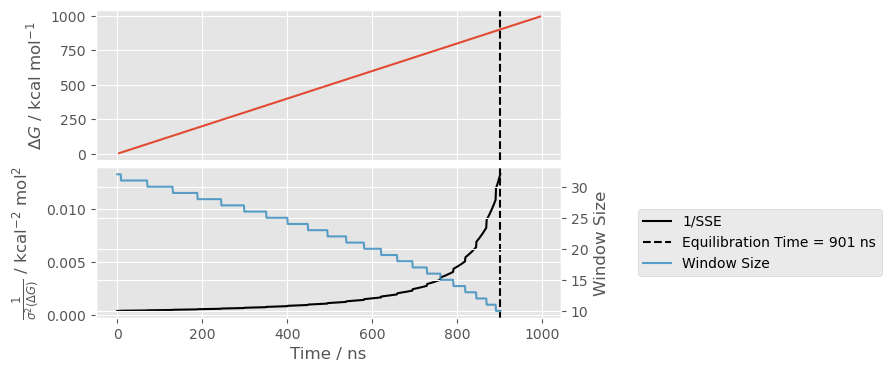

In [9]:
idx, g, ess = red.detect_equilibration_window(Rgyr2KKW[:,0], method="min_sse", plot=True)

In [10]:
print(ess)

11.096437933557604


In [11]:
import os

data_folder = '../../stridedTrajectoriesPDBProteinH/'

file1='AzumaTrajectory/trim100psStrideTrajectoryAzuma_proteinH.pdb'
path1 = os.path.join(data_folder, file1)
u = mda.Universe(path1, dt=10000)

In [12]:
# Calculate radius of gyration in all frames of trajectory
Rgyr2KKW = []
print(len(u.trajectory))
for ts in u.trajectory:
    Rgyr2KKW.append((u.trajectory.time, u.atoms.radius_of_gyration()))
    
Rgyr2KKW = np.array(Rgyr2KKW)
Rgyr2KKW[:,0] = Rgyr2KKW[:,0]/1000 #make sure units are in ns, must be run once only

10002


In [13]:
print(len(Rgyr2KKW[:,0]))

10002


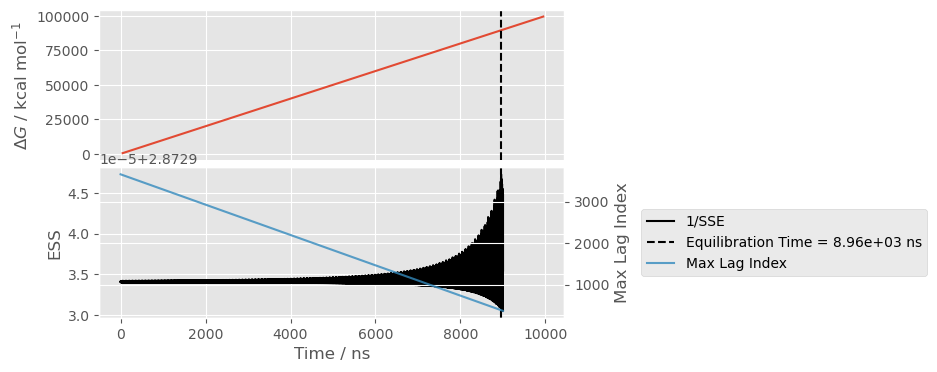

In [14]:
idx, g, ess = red.detect_equilibration_init_seq(Rgyr2KKW[:,0], method="max_ess", plot=True)

In [15]:
print(idx)

8957
